# Binning function

In [173]:
import pandas as pd 
import numpy as np 
from astropy import table
from scipy import stats
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
from scipy.optimize import curve_fit
import time
from scipy.interpolate import interp1d
from astropy.io import ascii

start = time.time()


##In angstroms
resolution = 20


def bin_spectra(spectrum, resolution):
    
    lam = spectrum[:,0]
    flux = spectrum[:,1]
   
    number_of_bins = np.math.floor((lam[-1]-lam[0]) / resolution )
    
    #Binning
    flux_bin, bin_edge, index = scipy.stats.binned_statistic(lam, flux, statistic='mean', bins = number_of_bins)
   
    #Takes the mean of the edges of the bin in order to plot the binned spectrum
    bin_wavelength = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]
 
    #Make a table with the     
    bin_spectra = table.Table()
    flux_bin   = np.array(flux_bin)
    flux_bin = flux_bin/(np.median(flux_bin))
    bin_spectra['lam_bin'] = bin_wavelength
    bin_spectra['bin_flux'] = flux_bin
    
   
    bin_wavelength = np.array(bin_wavelength)
    
    #temp_interp  = interpolate.interp1d(bin_wavelength, flux_bin,  bounds_error=False, fill_value=np.nan)
    
    return bin_spectra

end = time.time()
print(end - start)


#E.g using the function

spectrum = np.loadtxt("/Users/user/Desktop/ssf/superfit/rebinned/combined/sn1988l.u00.E-unsmoothed.dat")
#result= bin_spectra(spectrum,20)
print(spectrum)



0.00020003318786621094
[[3.99101409e+03 1.05166691e+00]
 [4.01103960e+03 1.12596438e+00]
 [4.03106510e+03 1.04244232e+00]
 [4.05109060e+03 9.84013257e-01]
 [4.07111611e+03 1.00955041e+00]
 [4.09114161e+03 1.01117304e+00]
 [4.11116711e+03 9.84788950e-01]
 [4.13119262e+03 9.39476561e-01]
 [4.15121812e+03 9.05154419e-01]
 [4.17124362e+03 9.15316361e-01]
 [4.19126913e+03 9.33112932e-01]
 [4.21129463e+03 9.62248478e-01]
 [4.23132013e+03 9.88473894e-01]
 [4.25134564e+03 1.05225175e+00]
 [4.27137114e+03 1.09180907e+00]
 [4.29139664e+03 1.03875251e+00]
 [4.31142215e+03 1.03690118e+00]
 [4.33144765e+03 1.18375244e+00]
 [4.35147315e+03 1.20161680e+00]
 [4.37149866e+03 1.16459384e+00]
 [4.39152416e+03 1.13808665e+00]
 [4.41154966e+03 1.20035698e+00]
 [4.43157517e+03 1.27829653e+00]
 [4.45160067e+03 1.33824127e+00]
 [4.47162617e+03 1.43419974e+00]
 [4.49165168e+03 1.60145114e+00]
 [4.51167718e+03 1.69581516e+00]
 [4.53170268e+03 1.74755898e+00]
 [4.55172819e+03 1.85976360e+00]
 [4.57175369e+03 1.9

In [96]:
#Reading Spectra
import glob


templates_gal = glob.glob('gal/**/*')
templates_gal = [x for x in templates_gal if 'CVS' not in x and 'README' not in x]
templates_gal = np.array(templates_gal)

templates_sn = glob.glob('sne/**/*')
templates_sn = [x for x in templates_sn if 'CVS' not in x and 'README' not in x]
templates_sn = np.array(templates_sn)

print(templates_gal)

['gal/pegase/spec_E.dat' 'gal/pegase/spec_Sbc.dat'
 'gal/pegase/spec_Sb.dat' 'gal/pegase/spec_Im.dat'
 'gal/pegase/spec_Sc.dat' 'gal/pegase/spec_Sa.dat'
 'gal/pegase/spec_Sd.dat' 'gal/pegase/spec_S0.dat'
 'gal/pegase/spec_Sc.norm.dat' 'gal/kinney/Sc-smoothed.dat'
 'gal/kinney/S0-unsmoothed.dat' 'gal/kinney/Sc-unsmoothed.dat'
 'gal/kinney/SB2-unsmoothed.dat' 'gal/kinney/E-unsmoothed.dat'
 'gal/kinney/SB5-unsmoothed.dat' 'gal/kinney/SB4-unsmoothed.dat'
 'gal/kinney/Sb-unsmoothed.dat' 'gal/kinney/SB3-unsmoothed.dat'
 'gal/kinney/SB1-unsmoothed.dat' 'gal/kinney/SB6-unsmoothed.dat'
 'gal/kinney/Sa-unsmoothed.dat' 'gal/poggianti/Sb_bianca'
 'gal/poggianti/S0_bianca' 'gal/poggianti/SB2_bianca'
 'gal/poggianti/Sd_bianca' 'gal/poggianti/El_bianca'
 'gal/poggianti/SB1_bianca' 'gal/poggianti/Sc_bianca'
 'gal/poggianti/Sa_bianca' 'gal/rest/Sb' 'gal/rest/Sc'
 'gal/rest/sdssquasarhead.asc' 'gal/rest/SB3' 'gal/rest/SB4'
 'gal/rest/gal.list' 'gal/rest/SB5' 'gal/rest/SB2' 'gal/rest/Sa'
 'gal/rest/S0' '

In [109]:
#This worked but it also keeps giving me an error of " Table object is not callable "

from astropy import table
import numpy as np 
import astropy
from scipy import stats
import scipy

resolution = 20
for i in templates_sn:
    
    print(i)
    spectrum=np.loadtxt(i)
    result = bin_spectra(spectrum,resolution)
    np.savetxt("/Users/user/Desktop/ssf/superfit/rebinned/{0}".format(i) ,result)    
    


sne/II/sn2005db.p86.dat
sne/II/sn1997cy.u31.dat
sne/II/sn2005cs.p14.dat
sne/II/sn1987a.m84.dat
sne/II/sn2004et.p47.dat
sne/II/sn2005cs.p01.dat
sne/II/sn2008ax.p35.dat
sne/II/sn1986I.p50.dat
sne/II/sn2004et.p45.dat
sne/II/sn1999em.p15.dat
sne/II/sn2005cs.p02.dat
sne/II/sn2005cp.u201.dat
sne/II/sn2005cs.p33.dat~
sne/II/theory99em.p15.dat
sne/II/theory99em.45.dat
sne/II/theory99em.p05.dat
sne/II/sn1980K.p41.dat
sne/II/sn2005cs.p06.dat
sne/II/sn1993j.p60.dat
sne/II/sn1979C.p43.dat
sne/II/sn1993W.p99.dat
sne/II/sn1999em.p04.dat
sne/II/sn2005cl.p70.dat
sne/II/sn1986I.p83.dat
sne/II/theory99em.p10.dat
sne/II/sn2005db.p40.dat
sne/II/sn2004et.p323.dat
sne/II/sn2005cs.p05.dat
sne/II/sn2005cs.p11.dat
sne/II/sn1987a.max.dat
sne/II/sn2004et.p95.dat
sne/II/sn2005bx.p11.dat
sne/II/sn1988A.p03.dat
sne/II/sn1999em.p75.dat
sne/II/sn1986I.p19.dat
sne/II/sn2005cl.p15.dat
sne/II/sn1987a.p113.dat
sne/II/sn2004et.p391.dat
sne/II/sn2004et.p384.dat
sne/II/sn2005cs.p59.dat
sne/II/sn2004et.p169.dat
sne/II/sn1993

sne/Ib/sn2005la.u05.dat
sne/Ib/sn2005la.u11.dat
sne/Ib/sn1991ar.u16.dat
sne/Ib/sn2006jc.p54.dat
sne/Ib/sn2005la.u10.dat
sne/Ib/sn1984L.p30.dat
sne/Ib/sn1990u.p41.dat
sne/Ib/sn1999di.p21.dat
sne/Ib/sn2005e.p24.dat
sne/Ib/sn2000h.p30.dat
sne/Ib/sn2005e.p19.dat
sne/Ib/sn1999ex.p14.dat
sne/Ib/sn1983V.p38.dat
sne/Ib/sn2006jc.p84.dat
sne/Ib/sn1999ex.p05.dat
sne/Ib/sn1984L.p34.dat
sne/Ib/sn2008d.p40.dat
sne/Ib/sn2006jc.p36.dat
sne/Ib/sn2006jc.p37.dat
sne/Ib/sn1987M.p07.dat
sne/Ib/sn2008d.p30.dat
sne/Ib/sn2008d.p18.dat
sne/Ib/sn2006jc.p21.dat
sne/Ib/sn2006jc.p35.dat
sne/Ib/sn1998dt.p33.dat
sne/Ib/sn2005e.p52.dat
sne/Ib/sn2006jc.p34.dat
sne/Ib/sn1999dn.p17.dat
sne/Ib/sn2005e.p57.dat
sne/Ib/sn2006jc.p25.dat
sne/Ib/sn1999dn.p10.dat
sne/Ib/sn1999dn.p38.dat
sne/Ib/sn2006jc.p33.dat
sne/Ib/sn1996cb.u63.dat
sne/Ib/sn1998dt.p08.dat
sne/Ib/sn1999di.p45.dat
sne/Ib/sn1984L.p73.dat
sne/Ib/sn2008d.m14.dat
sne/Ib/sn2008d.p13.dat
sne/Ib/sn2008d.p11.dat
sne/Ib/sn2008d.m17.dat
sne/Ib/sn2008d.p04.dat
sne/Ib/sn19

# Combined SN and HG

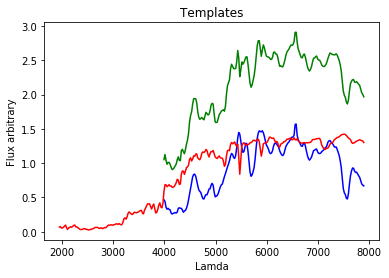

In [165]:
#Combined from the rebinned library 

sn = np.loadtxt("/Users/user/Desktop/ssf/superfit/rebinned/sne/Ic/sn1988l.u00.dat")
hg = np.loadtxt("/Users/user/Desktop/ssf/superfit/rebinned/gal/kinney/E-unsmoothed.dat")

sn_interp = interpolate.interp1d(sn[:,0],sn[:,1], bounds_error=False, fill_value=np.nan)
hg_interp = interpolate.interp1d(hg[:,0],hg[:,1], bounds_error=False, fill_value=np.nan)

combined_spectra = sn_interp(lam) + hg_interp(lam)

plt.plot(lam, sn_interp(lam),'b')
plt.plot(lam, hg_interp(lam),'r')
plt.plot(lam, combined_spectra,'g')
plt.ylabel('Flux arbitrary')
plt.xlabel('Lamda')
plt.title('Templates')
plt.show()


#Take the transpose and make into a file 
temp=np.array([lam,combined_spectra]).T
idx=np.where(temp[:,1] > -10)[0]
print(idx)
temp=temp[idx,:]

np.savetxt("/Users/user/Desktop/ssf/superfit/rebinned/combined/sn1988l.u00.E-unsmoothed.dat",temp)

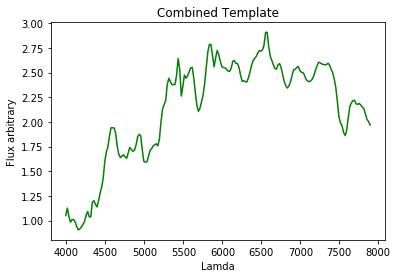

298


In [168]:
#Combined template

plt.plot(lam, combined_spectra,'g')
plt.ylabel('Flux arbitrary')
plt.xlabel('Lamda')
plt.title('Combined Template')
plt.show()

print(len(combined_spectra))
